In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

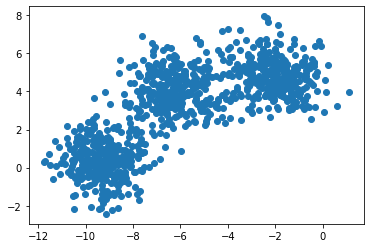

In [74]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

plt.scatter(X[:, 0], X[:, 1])

In [75]:
from sklearn.cluster import KMeans

Initialization complete
Iteration 0, inertia 6814.690893134555
Iteration 1, inertia 5063.945541485721
Iteration 2, inertia 4988.239857915881
Initialization complete
Iteration 0, inertia 6850.868557675507
Iteration 1, inertia 4773.730847740503
Iteration 2, inertia 4770.998294965646


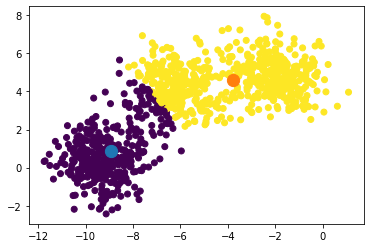

In [135]:
model = KMeans(n_clusters=2, n_init=2, verbose=1, max_iter=3)

model.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=model.labels_)
for [xi, yi] in model.cluster_centers_:
    plt.scatter(xi, yi, s=150)

In [145]:
class CustomKMeans:
    
    def __init__(self, n_clusters=2, n_init=4):
        self.n_clusters = n_clusters
        self.n_init = n_init
        
    
    def fit(self, X):
        
        error_turns = []
        votes_turns = []
        centers_turns = []
        
        for turn in range(self.n_init):
            
            cluster_centers_ = X[np.random.randint(0, X.shape[0], self.n_clusters)]

        
            for it in range(20):

                error = 0
                votes = []

                for point in X:
                    d = np.sqrt(np.power(cluster_centers_ - point, 2).sum(axis=1))
                    closest = d.argmin()
                    error += d[closest]
                    votes.append(closest)


                votes_arr = np.array(votes)
                for i in range(cluster_centers_.shape[0]):
                    cluster_centers_[i] = X[votes_arr==i].mean(axis=0)
                    
            
            error_turns.append(error)
            votes_turns.append(votes)
            centers_turns.append(cluster_centers_)
                
        
        selected_index = np.argmin(error_turns)
        
        print(error_turns)
        
        self.cluster_centers_ = centers_turns[selected_index]
        self.labels_ = votes_turns[selected_index]
        
        

In [148]:
model = CustomKMeans(n_clusters=3)

In [149]:
model.fit(X)

[1228.6407244431043, 1228.6407244431043, 1228.6407244431043, 1228.6407244431043]


In [150]:
model.cluster_centers_

array([[-6.21316889,  4.09356584],
       [-1.98697012,  4.81461563],
       [-9.23981574,  0.4277436 ]])

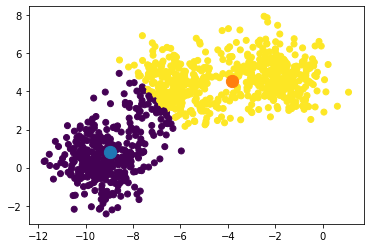

In [144]:
plt.scatter(X[:, 0], X[:, 1], c=model.labels_)
for [xi, yi] in model.cluster_centers_:
    plt.scatter(xi, yi, s=150)

In [139]:
np.argmax?

Signature: np.argmax(a, axis=None, out=None)
Docstring:
Returns the indices of the maximum values along an axis.

Parameters
----------
a : array_like
    Input array.
axis : int, optional
    By default, the index is into the flattened array, otherwise
    along the specified axis.
out : array, optional
    If provided, the result will be inserted into this array. It should
    be of the appropriate shape and dtype.

Returns
-------
index_array : ndarray of ints
    Array of indices into the array. It has the same shape as `a.shape`
    with the dimension along `axis` removed.

See Also
--------
ndarray.argmax, argmin
amax : The maximum value along a given axis.
unravel_index : Convert a flat index into an index tuple.
take_along_axis : Apply ``np.expand_dims(index_array, axis)``
                  from argmax to an array as if by calling max.

Notes
-----
In case of multiple occurrences of the maximum values, the indices
corresponding to the first occurrence are returned.

Examples
--